### This is a Convolutional Neural Network for the MNIST like datatset for Kannada handwritten digits. All the relevant information and the data sets are available here: https://github.com/vinayprabhu/Kannada_MNIST and here: https://www.kaggle.com/higgstachyon/kannada-mnist/

In [0]:
import numpy as np 
import pandas as pd

In [2]:
## IF YOU USE GOOGLE  COLAB
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [4]:
uploaded = files.upload()

Saving Dig-MNIST.csv to Dig-MNIST.csv


In [0]:
Dig_MNIST = pd.read_csv(io.BytesIO(uploaded['Dig-MNIST.csv']))

In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import LeakyReLU
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt 

Using TensorFlow backend.


The dataset  consists of handwritten digits for the Kannada script. Dig_MNIST is a real world handwritten dataset that can serve as an out-of-domain test dataset.

In [7]:
print(" dataset shape = " +str(data.shape))
print("Dig set shape = " +str(Dig_MNIST.shape))

 dataset shape = (60000, 785)
Dig set shape = (10240, 785)


In [8]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We slice the dataframes to define the features and the labels

In [9]:
X=data.iloc[:,1:].values 
Y=data.iloc[:,0].values 
Y[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Now we must reshape the date to make it Keras friendly.

In [10]:
X = X.reshape(X.shape[0], 28, 28,1) 
print(X.shape)


(60000, 28, 28, 1)


Now we convert the labels to categorical.

In [11]:
Y = keras.utils.to_categorical(Y, 10) 
print(Y.shape)

(60000, 10)


In [12]:
Dig_MNIST.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
x_dig=Dig_MNIST.drop('label',axis=1).iloc[:,:].values
print(x_dig.shape)
x_dig = x_dig.reshape(x_dig.shape[0], 28, 28,1)
x_dig.shape

(10240, 784)


(10240, 28, 28, 1)

In [14]:
y_dig=Dig_MNIST.label
y_dig.shape

(10240,)

We split the data into training and validation set.

In [0]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.10, random_state=42) 

We use Keras ImageDataGenerator to artificially increase our training set.

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 10,
                                   width_shift_range = 0.25,
                                   height_shift_range = 0.25,
                                   shear_range = 0.1,
                                   zoom_range = 0.25,
                                   horizontal_flip = False)

In [0]:
valid_datagen = ImageDataGenerator(rescale=1./255) 

The next function reduces the learning rate as the training advances.

In [0]:
def lr_decay(epoch):#lrv
    return initial_learningrate * 0.99 ** epoch

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),    
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.1),
 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_______________________________________________________

In [0]:
initial_learningrate=2e-3
batch_size = 1024
epochs = 50
input_shape = (28, 28, 1)

In [0]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=10)

In [0]:
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(lr=initial_learningrate),
              metrics=['accuracy'])

In [0]:
from sklearn import metrics


In [24]:
history = model.fit_generator(
      train_datagen.flow(X_train,Y_train, batch_size=batch_size),
      steps_per_epoch=100,
      epochs=epochs,
      callbacks=[LearningRateScheduler(lr_decay),
                 es
               ],
      validation_data=valid_datagen.flow(X_valid,Y_valid),
      validation_steps=50,  
      verbose=2)

Epoch 1/50
Epoch 1/50
100/100 - 58s - loss: 0.5657 - acc: 0.8158 - val_loss: 0.9060 - val_acc: 0.9494
Epoch 2/50
Epoch 1/50
100/100 - 46s - loss: 0.1011 - acc: 0.9678 - val_loss: 0.1229 - val_acc: 0.9894
Epoch 3/50
Epoch 1/50
100/100 - 46s - loss: 0.0632 - acc: 0.9793 - val_loss: 0.0391 - val_acc: 0.9937
Epoch 4/50
Epoch 1/50
100/100 - 46s - loss: 0.0527 - acc: 0.9821 - val_loss: 0.0322 - val_acc: 0.9900
Epoch 5/50
Epoch 1/50
100/100 - 46s - loss: 0.0455 - acc: 0.9848 - val_loss: 0.0158 - val_acc: 0.9956
Epoch 6/50
Epoch 1/50
100/100 - 45s - loss: 0.0385 - acc: 0.9874 - val_loss: 0.0283 - val_acc: 0.9925
Epoch 7/50
Epoch 1/50
100/100 - 45s - loss: 0.0376 - acc: 0.9878 - val_loss: 0.0133 - val_acc: 0.9962
Epoch 8/50
Epoch 1/50
100/100 - 44s - loss: 0.0353 - acc: 0.9884 - val_loss: 0.0200 - val_acc: 0.9944
Epoch 9/50
Epoch 1/50
100/100 - 45s - loss: 0.0330 - acc: 0.9891 - val_loss: 0.0144 - val_acc: 0.9969
Epoch 10/50
Epoch 1/50
100/100 - 45s - loss: 0.0323 - acc: 0.9890 - val_loss: 0.01

In [25]:
preds_dig=model.predict_classes(x_dig/255)
metrics.accuracy_score(preds_dig, y_dig)

0.90859375

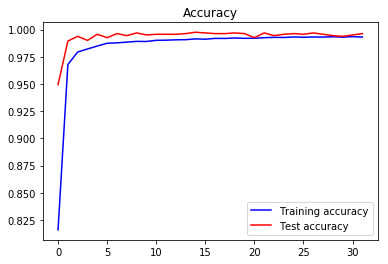

In [26]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Test accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

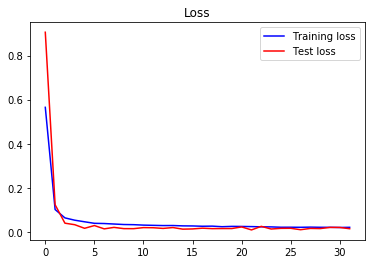

In [27]:
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Test loss')
plt.title('Loss')
plt.legend()
plt.show()